# Machine Learning - FYP

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import drive

####2) LSTM RNN architecture to predict timeseries data
a) Forming sequences to predict data using only 1 parameter (univariate)

Reading the file and extracting the data

In [12]:
# Reading file

drive.mount('/content/gdrive')
data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/dataset.xlsx')

# Reading dataset and separating input features (X) and target labels (y)
X = data.iloc[:1000,5]  # Input features

print(X)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
0      2.430277
1      2.428745
2      2.428366
3      2.427997
4      2.427640
         ...   
995    2.344677
996    2.344657
997    2.344638
998    2.344618
999    2.344598
Name: V_cur, Length: 1000, dtype: float64


Scaling and training dataset

In [19]:
# Prepare data into sequences
sequence_length = 100  # Number of time steps per sequence
sequences = []
for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])

sequences = np.array(sequences)

# Split data into training and test sets and apply scaling
X_train, X_test = train_test_split(sequences, test_size=0.2, shuffle=False)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = X_train # No scaling

# print(X_train_scaled)


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.80725928e-01 9.95146028e-01 9.95254924e-01 ... 9.94063232e-01
  9.94181461e-01 9.94294345e-01]
 [9.75963987e-01 9.90422467e-01 9.90651214e-01 ... 9.88276914e-01
  9.88506717e-01 9.88726280e-01]
 ...
 [6.29457936e-04 6.40853027e-04 6.43001376e-04 ... 7.99252098e-04
  8.02957823e-04 8.06585397e-04]
 [3.14539752e-04 3.20234374e-04 3.21308407e-04 ... 3.99440504e-04
  4.01293020e-04 4.03106483e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Model

In [14]:
# RNN model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
X_train_reshaped = X_train_scaled.reshape(-1, sequence_length, 1)  # reshapes the training input data X_train_scaled into a 3D array with dimensions (batch_size, sequence_length, input_features)
y_train = X_train_scaled[:, -1]  # Predict the next value in the sequence based on last value in each sequence
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=16)

Epoch 1/50
45/45 [==============================] - 4s 40ms/step - loss: 0.0598
Epoch 2/50
45/45 [==============================] - 2s 40ms/step - loss: 0.0526
Epoch 3/50
45/45 [==============================] - 2s 40ms/step - loss: 0.0524
Epoch 4/50
45/45 [==============================] - 2s 46ms/step - loss: 0.0518
Epoch 5/50
45/45 [==============================] - 3s 59ms/step - loss: 0.0512
Epoch 6/50
45/45 [==============================] - 3s 58ms/step - loss: 0.0517
Epoch 7/50
45/45 [==============================] - 2s 44ms/step - loss: 0.0517
Epoch 8/50
45/45 [==============================] - 2s 39ms/step - loss: 0.0515
Epoch 9/50
45/45 [==============================] - 2s 40ms/step - loss: 0.0516
Epoch 10/50
45/45 [==============================] - 2s 39ms/step - loss: 0.0515
Epoch 11/50
45/45 [==============================] - 2s 47ms/step - loss: 0.0515
Epoch 12/50
45/45 [==============================] - 3s 60ms/step - loss: 0.0513
Epoch 13/50
45/45 [==================

Predicting next timesteps

In [18]:
# Predict the remaining data (adjust as needed)
num_predictions = len(X) - len(X_train)
predicted_data = []

# Start with the last sequence from the training data
current_sequence = X_train_scaled[-1, :, np.newaxis]

for _ in range(num_predictions):
    # Predict the next value in the sequence
    next_value = model.predict(current_sequence[np.newaxis, :, :])

    # Append the predicted value to the result
    predicted_data.append(next_value[0, 0])

    # Update the current sequence for the next prediction
    current_sequence = np.roll(current_sequence, shift=-1, axis=0)
    current_sequence[-1] = next_value[0, 0]

print(predicted_data)

1/1 [==============================] - 0s 19ms/step
[array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), array([0.1875824], dtype=float32), ar

Plotting

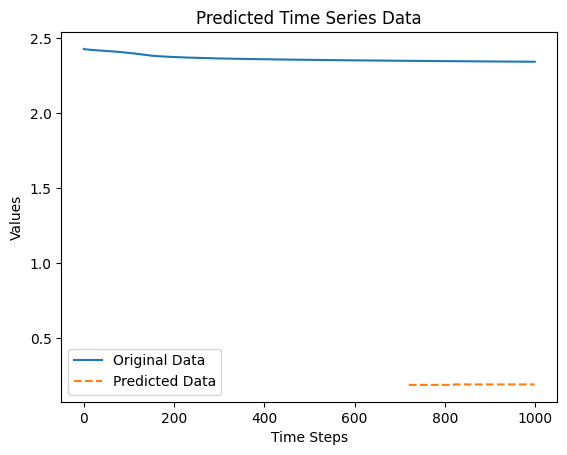

In [17]:
# Visualize the predicted time series data
plt.plot(X, label='Original Data')
plt.plot(range(len(X_train), len(X_train)+num_predictions), predicted_data, label='Predicted Data', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.title('Predicted Time Series Data')
plt.show()